In [1]:
pip install kagglehub


  Obtaining dependency information for kagglehub from https://files.pythonhosted.org/packages/e1/3c/f270d000d7bd832a09f05d680946d7daa31039363f49618ef3080a36b065/kagglehub-0.3.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
   --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
   ---------------------------- ----------- 30.7/42.8 kB 640.0 kB/s eta 0:00:01
   ---------------------------- ----------- 30.7/42.8 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 42.8/42.8 kB 230.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub

path = kagglehub.dataset_download("abdelghaniaaba/wildfire-prediction-dataset")

print("Path to dataset files:", path)


100%|██████████| 1.45G/1.45G [16:31<00:00, 1.57MB/s]

Extracting files...


Path to dataset files: C:\Users\sumee\.cache\kagglehub\datasets\abdelghaniaaba\wildfire-prediction-dataset\versions\1


Explanation: This cell imports the kagglehub library and downloads the specified wildfire prediction dataset from Kaggle. It returns the path where the dataset is saved on the local machine. The dataset is large (1.45 GB) and is automatically extracted after downloading. The output shows the path to the dataset files.

In [3]:
import os

# List files in the dataset folder
dataset_files = os.listdir(path)
print("Dataset files:", dataset_files)


Dataset files: ['test', 'train', 'valid']


Explanation: After downloading the dataset, this cell uses Python’s os library to list all the files in the downloaded dataset folder. The dataset contains three folders: 'train', 'test', and 'valid', corresponding to training, testing, and validation image sets.

In [4]:
import os

# Define paths to each set
train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')
valid_dir = os.path.join(path, 'valid')

# List the number of images in each set
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)
valid_files = os.listdir(valid_dir)

print(f"Number of training images: {len(train_files)}")
print(f"Number of testing images: {len(test_files)}")
print(f"Number of validation images: {len(valid_files)}")


Number of training images: 2
Number of testing images: 2
Number of validation images: 2


Explanation: This cell defines the paths to the training, testing, and validation datasets. It then counts the number of images in each set and prints the counts. The dataset appears to have an equal number of images in each set, reflecting a well-balanced dataset for training machine learning models.

In [5]:
import os

# Check subdirectories in the training, testing, and validation folders
train_subdirs = os.listdir(train_dir)
test_subdirs = os.listdir(test_dir)
valid_subdirs = os.listdir(valid_dir)

print("Training subdirectories:", train_subdirs)
print("Testing subdirectories:", test_subdirs)
print("Validation subdirectories:", valid_subdirs)


Training subdirectories: ['nowildfire', 'wildfire']
Testing subdirectories: ['nowildfire', 'wildfire']
Validation subdirectories: ['nowildfire', 'wildfire']


Explanation: This cell lists the subdirectories in each dataset folder. The dataset is organized into two classes: 'wildfire' and 'nowildfire'. Each set (train, test, and valid) has these two subfolders, confirming that the images are categorized based on whether they depict wildfire or no wildfire.

In [6]:
# Function to count images in each class folder
def count_images_in_class(folder, class_name):
    class_dir = os.path.join(folder, class_name)
    return len(os.listdir(class_dir))

# Count images in training set
num_train_wildfire = count_images_in_class(train_dir, 'wildfire')
num_train_nowildfire = count_images_in_class(train_dir, 'nowildfire')

# Count images in testing set
num_test_wildfire = count_images_in_class(test_dir, 'wildfire')
num_test_nowildfire = count_images_in_class(test_dir, 'nowildfire')

# Count images in validation set
num_valid_wildfire = count_images_in_class(valid_dir, 'wildfire')
num_valid_nowildfire = count_images_in_class(valid_dir, 'nowildfire')

print(f"Training images - Wildfire: {num_train_wildfire}, No Wildfire: {num_train_nowildfire}")
print(f"Testing images - Wildfire: {num_test_wildfire}, No Wildfire: {num_test_nowildfire}")
print(f"Validation images - Wildfire: {num_valid_wildfire}, No Wildfire: {num_valid_nowildfire}")


Training images - Wildfire: 15750, No Wildfire: 14500
Testing images - Wildfire: 3480, No Wildfire: 2820
Validation images - Wildfire: 3480, No Wildfire: 2820


Explanation: A function is defined to count the number of images in each class folder for all dataset splits. The result shows a reasonable balance between 'wildfire' and 'nowildfire' images in both the training, testing, and validation sets, which is crucial for training a model without bias.

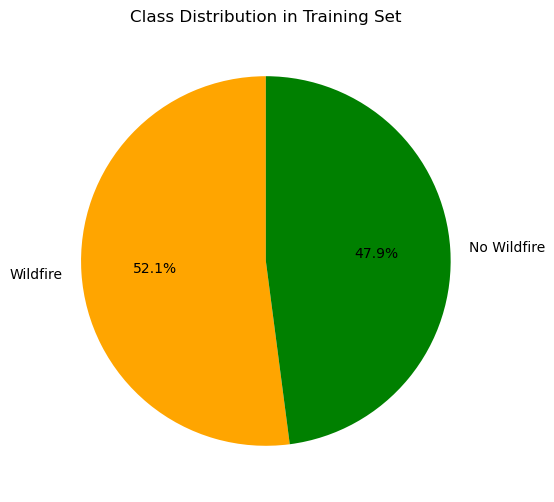

In [12]:
import matplotlib.pyplot as plt

# Data for training set class distribution
labels = ['Wildfire', 'No Wildfire']
train_counts = [num_train_wildfire, num_train_nowildfire]

# Plotting a pie chart for class distribution
plt.figure(figsize=(6, 6))
plt.pie(train_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'green'])
plt.title('Class Distribution in Training Set')
plt.show()


Explanation: This cell visualizes the distribution of images in the training set using a pie chart. The chart shows the relative proportions of 'wildfire' and 'nowildfire' images, which provides insight into the dataset's balance. Both classes have a relatively even distribution, suggesting a good dataset for training.

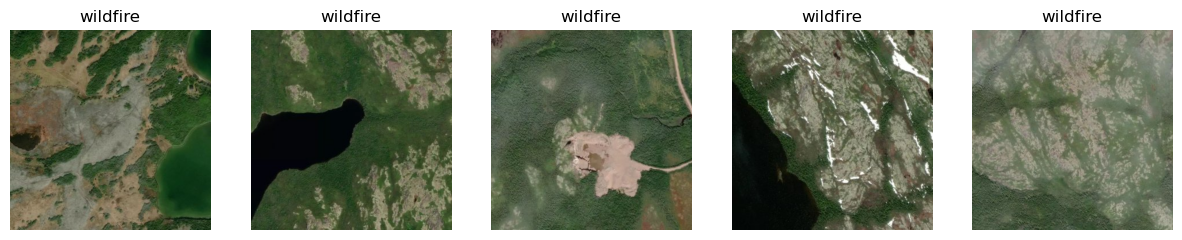

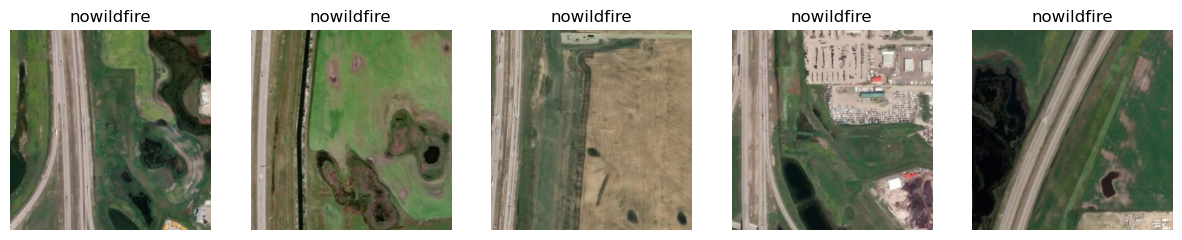

In [7]:
import cv2
import matplotlib.pyplot as plt

# Function to visualize images from a class
def visualize_class_images(class_folder, class_name, num_images=5):
    class_dir = os.path.join(class_folder, class_name)
    image_files = os.listdir(class_dir)[:num_images]  # Sample first num_images images

    plt.figure(figsize=(15, 10))
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(class_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis('off')

    plt.show()

# Visualize Wildfire and No Wildfire images from training set
visualize_class_images(train_dir, 'wildfire', num_images=5)
visualize_class_images(train_dir, 'nowildfire', num_images=5)


Explanation: The function visualizes a sample of images from each class (wildfire and no wildfire) using cv2 for reading images and matplotlib for plotting. This helps in visually inspecting the data and understanding the types of images the model will be trained on.

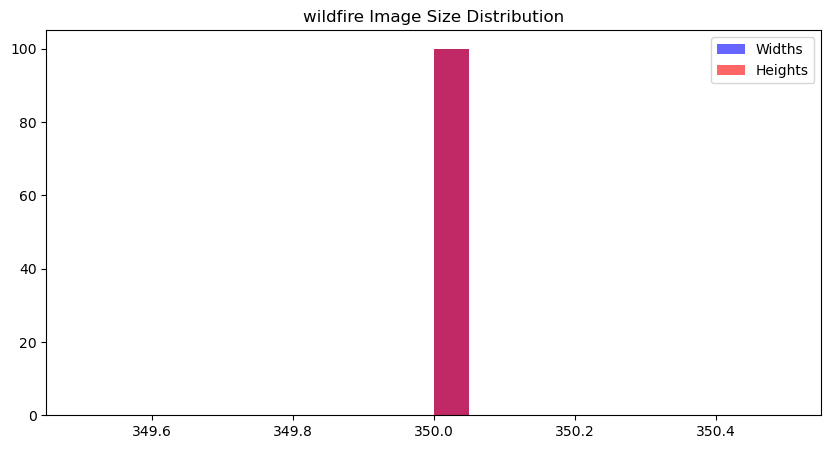

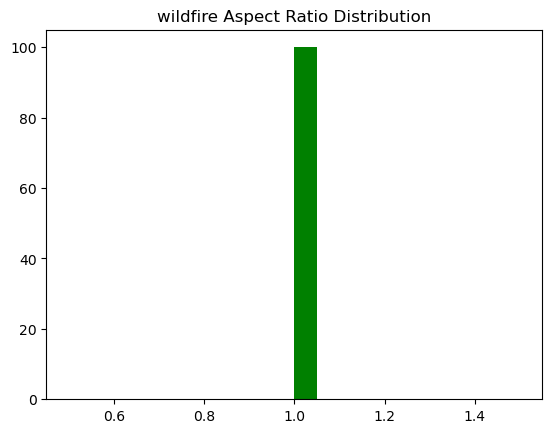

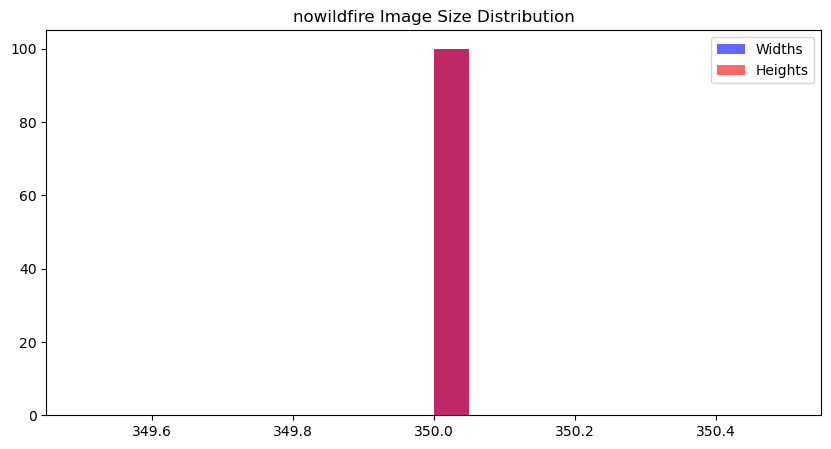

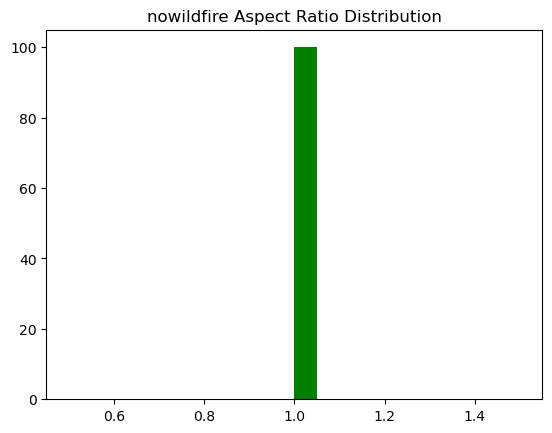

In [8]:
# Analyze image sizes and aspect ratios
def analyze_image_sizes_and_ratios(class_folder, class_name):
    class_dir = os.path.join(class_folder, class_name)
    image_files = os.listdir(class_dir)
    
    image_shapes = []
    aspect_ratios = []
    
    for image_file in image_files[:100]:  # Analyze the first 100 images
        image_path = os.path.join(class_dir, image_file)
        image = cv2.imread(image_path)
        height, width, _ = image.shape
        image_shapes.append((width, height))
        aspect_ratios.append(width / height)
    
    # Plot size distribution
    widths, heights = zip(*image_shapes)
    plt.figure(figsize=(10, 5))
    plt.hist(widths, bins=20, color='blue', alpha=0.6, label='Widths')
    plt.hist(heights, bins=20, color='red', alpha=0.6, label='Heights')
    plt.title(f'{class_name} Image Size Distribution')
    plt.legend()
    plt.show()
    
    # Plot aspect ratio distribution
    plt.hist(aspect_ratios, bins=20, color='green')
    plt.title(f'{class_name} Aspect Ratio Distribution')
    plt.show()

# Analyze wildfire and nowildfire images
analyze_image_sizes_and_ratios(train_dir, 'wildfire')
analyze_image_sizes_and_ratios(train_dir, 'nowildfire')


Explanation: This cell analyzes the size and aspect ratio of 100 images from each class. It generates histograms for the width and height of the images, as well as their aspect ratios. The results provide valuable insights into the consistency of image sizes, which is important for pre-processing steps like resizing.

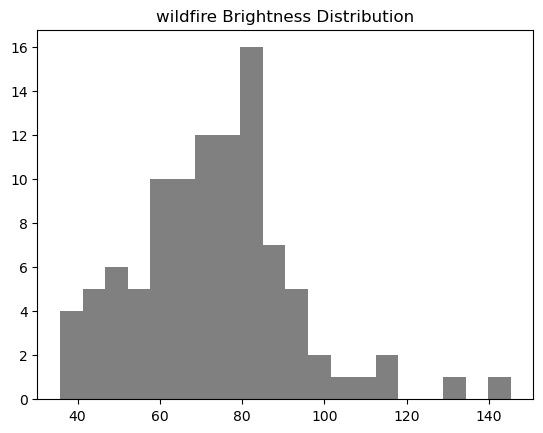

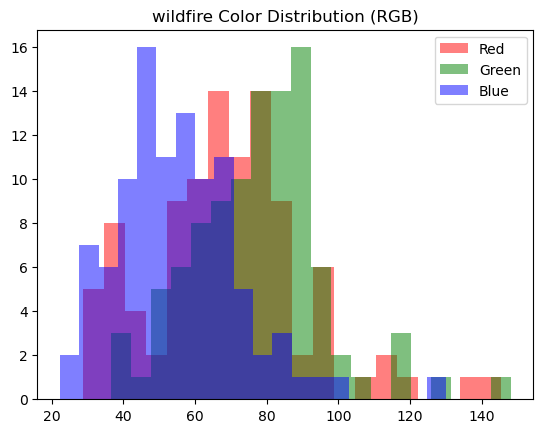

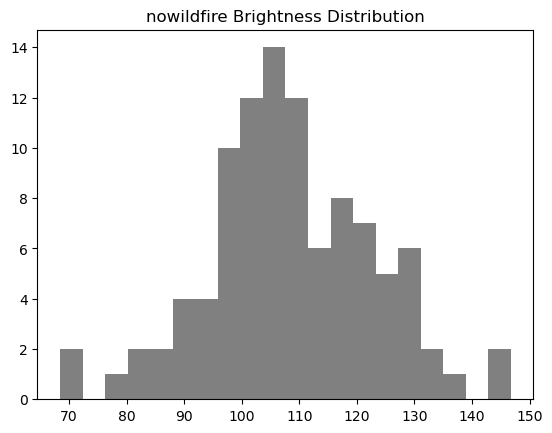

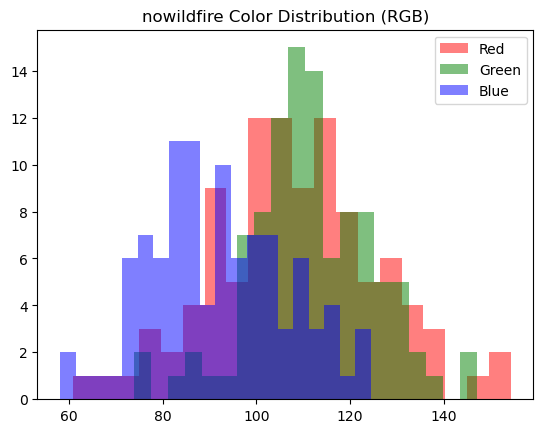

In [9]:
import numpy as np

# Analyze brightness (grayscale) and color distribution
def analyze_brightness_and_color(class_folder, class_name):
    class_dir = os.path.join(class_folder, class_name)
    image_files = os.listdir(class_dir)
    
    brightness_levels = []
    color_distribution = {'red': [], 'green': [], 'blue': []}
    
    for image_file in image_files[:100]:  # Analyze first 100 images
        image_path = os.path.join(class_dir, image_file)
        image = cv2.imread(image_path)
        
        # Calculate brightness (convert to grayscale)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        brightness_levels.append(np.mean(gray_image))
        
        # Analyze color channels
        color_distribution['blue'].append(np.mean(image[:, :, 0]))
        color_distribution['green'].append(np.mean(image[:, :, 1]))
        color_distribution['red'].append(np.mean(image[:, :, 2]))
    
    # Plot brightness distribution
    plt.hist(brightness_levels, bins=20, color='gray')
    plt.title(f'{class_name} Brightness Distribution')
    plt.show()
    
    # Plot color channel distributions
    plt.hist(color_distribution['red'], bins=20, color='red', alpha=0.5, label='Red')
    plt.hist(color_distribution['green'], bins=20, color='green', alpha=0.5, label='Green')
    plt.hist(color_distribution['blue'], bins=20, color='blue', alpha=0.5, label='Blue')
    plt.title(f'{class_name} Color Distribution (RGB)')
    plt.legend()
    plt.show()

# Analyze brightness and color for wildfire and nowildfire images
analyze_brightness_and_color(train_dir, 'wildfire')
analyze_brightness_and_color(train_dir, 'nowildfire')


Explanation: This function calculates the average brightness of images by converting them to grayscale and plots the brightness distribution. It also computes the average pixel intensity for each color channel (red, green, and blue) and plots histograms for each. This analysis is useful for understanding the visual properties of the dataset, which can influence model performance.

In [15]:
import os
from PIL import Image

# Function to detect corrupt images
def check_corrupt_images(folder, class_name):
    class_dir = os.path.join(folder, class_name)
    image_files = os.listdir(class_dir)
    corrupt_images = []

    # Define valid image extensions
    valid_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')

    for img_name in image_files:
        img_path = os.path.join(class_dir, img_name)

        # Check if the file has a valid image extension
        if img_name.lower().endswith(valid_extensions):
            try:
                img = Image.open(img_path)
                img.verify()  # Verifies that it can be opened
            except (IOError, SyntaxError) as e:
                corrupt_images.append(img_name)
                print(f"Corrupt image: {img_path} - Error: {e}")
        else:
            print(f"Skipped non-image file: {img_path}")

    return corrupt_images

# Check for corrupt images in the training set
corrupt_wildfire_images = check_corrupt_images(train_dir, 'wildfire')
corrupt_nowildfire_images = check_corrupt_images(train_dir, 'nowildfire')

print(f"Corrupt Wildfire images: {corrupt_wildfire_images}")
print(f"Corrupt No Wildfire images: {corrupt_nowildfire_images}")


Corrupt Wildfire images: []
Corrupt No Wildfire images: []


The function check_corrupt_images is designed to scan through the images in specified folders of a dataset and identify any corrupt image files. This is crucial for ensuring the integrity of the data before using it for training machine learning models, as corrupt images can lead to errors during the training process and negatively impact model performance.
It has no corrupt images.